## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

The file is **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, the primary aim is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn as skl
from sklearn.linear_model import LinearRegression
from scipy import stats as spystats
import math
import statistics as stats
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b></b></span>

**HINTS** -
* split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* rename some columns so that they make sense to you.
* cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
bike_data=pd.read_csv('bike-share.csv')
bike_data.rename(columns={'dteday':'date'},inplace=True)
bike_data.rename(columns={'atemp':'feeltemp'},inplace=True)
bike_data.rename(columns={'cnt':'total'},inplace=True)

In [4]:
registered_ratio=bike_data['registered']/bike_data['total']
casual_ratio=bike_data['casual']/bike_data['total']
bike_data.insert(15,'registered_ratio',registered_ratio)
bike_data.insert(16,'casual_ratio',casual_ratio)

In [5]:
#group data by day,season,month,year,workingday,weather and day of week
#day_group=bike_data.groupby('day')['total'].agg(['mean','median','std'])
season_group=bike_data.groupby('season')['total'].agg(['mean','median','std'])
month_group=bike_data.groupby('mnth')['total'].agg(['mean','median','std'])
year_group=bike_data.groupby('yr')['total'].agg(['mean','median','std'])
work_group=bike_data.groupby('workingday')['total'].agg(['mean','median','std'])
weather_group=bike_data.groupby('weathersit')['total'].agg(['mean','median','std'])
dayweek_group=bike_data.groupby("weekday")['total'].agg(['mean','median','std'])

<span style="color:blue">
    
### First, I change some column name to makes it sense and easy to understand. After changing data and excluding instant and date variables because they are not useful, there is 14 variables with 7 categorical variables and 7 continuous variables. Here, the respondent variables are total, casual and registered which all represent the number of bikes rented. Also the total is the sum of casual and registered. Another thing is holiday and working day. Since non-working day where workingday is 0 includes both weekend and holiday, so I will analysis data mainly based on workingday variable. I also create two variables registered_ratio and casual_ratio which meansure the proportion of total numbers. 
</span>

## EXPLORATORY DATA ANALYSIS

**HINTS** -

* Explore data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on data and explain what they mean in the context of this dataset.

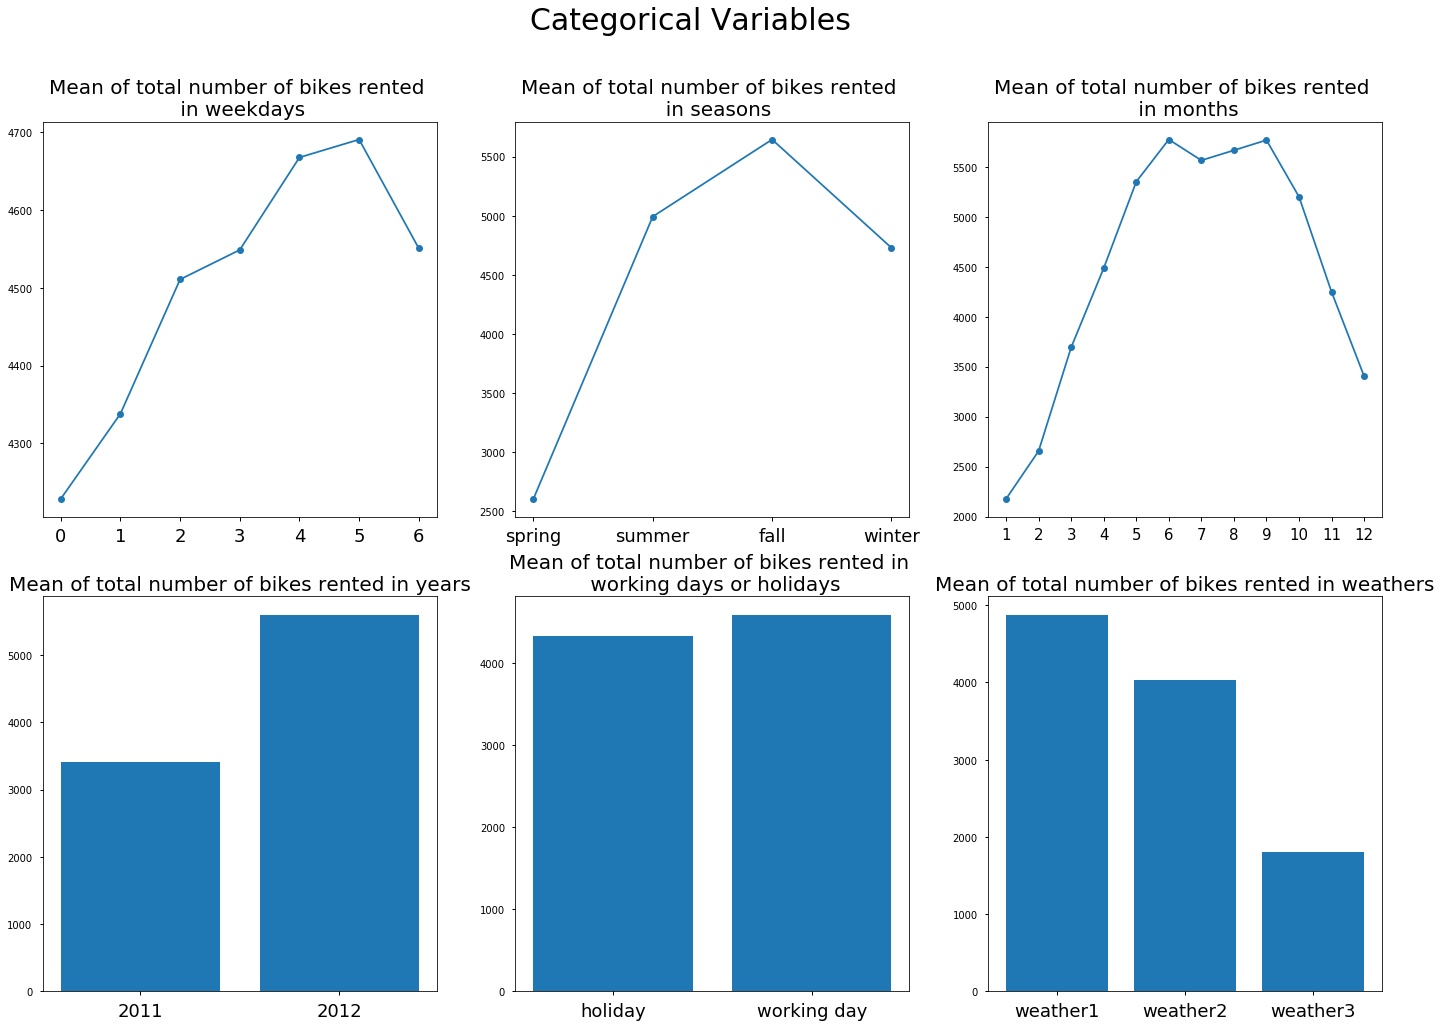

In [7]:
#explore categorical variables 
fig=plt.figure(figsize=(24,16))

ax1=fig.add_subplot(231)
ax1.plot(list(dayweek_group.index.values),list(dayweek_group['mean']),marker='o')
ax1.set_title('Mean of total number of bikes rented \n in weekdays',fontsize=20)
ax1.set_xticks(list(dayweek_group.index.values))
ax1.set_xticklabels(list(dayweek_group.index.values),fontsize=18)


ax2=fig.add_subplot(232)
ax2.plot(list(season_group.index.values),list(season_group['mean']),marker='o')
ax2.set_title('Mean of total number of bikes rented \n  in seasons',fontsize=20)
ax2.set_xticks(list(season_group.index.values))
ax2.set_xticklabels(['spring','summer','fall','winter'],fontsize=18)

ax3=fig.add_subplot(233)
ax3.plot(list(month_group.index.values),list(month_group['mean']),marker='o')
ax3.set_title('Mean of total number of bikes rented \n in months',fontsize=20)
ax3.set_xticks(list(month_group.index.values))
ax3.set_xticklabels(list(month_group.index.values),fontsize=15)

ax4=fig.add_subplot(234)
ax4.bar(list(year_group.index.values),list(year_group['mean']))
ax4.set_title('Mean of total number of bikes rented in years',fontsize=20)
ax4.set_xticks(list(year_group.index.values))
ax4.set_xticklabels(['2011','2012'],fontsize=18)

ax5=fig.add_subplot(235)
ax5.bar(list(work_group.index.values),list(work_group['mean']))
ax5.set_title('Mean of total number of bikes rented in \n working days or holidays',fontsize=20)
ax5.set_xticks(list(work_group.index.values))
ax5.set_xticklabels(['holiday','working day'],fontsize=18)

ax6=fig.add_subplot(236)
ax6.bar(list(weather_group.index.values),list(weather_group['mean']))
ax6.set_title('Mean of total number of bikes rented in weathers',fontsize=20)
ax6.set_xticks(list(weather_group.index.values))
ax6.set_xticklabels(['weather1','weather2','weather3'],fontsize=18)

fig.suptitle('Categorical Variables',fontsize=30)
plt.show()

In [8]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [9]:
df1=dayweek_group
df2=season_group
df3=month_group
df4=year_group
df5=work_group
df6=weather_group
display_side_by_side(df1,df2,df3)
display_side_by_side(df4,df5,df6)

,mean,median,std
weekday,,,
0,4228.828571,4334.0,1872.496629
1,4338.123810,4359.0,1793.074013
2,4510.663462,4576.5,1826.911642
3,4548.538462,4642.5,2038.095884
4,4667.259615,4721.0,1939.433317
5,4690.288462,4601.5,1874.624870
6,4550.542857,4521.0,2196.693009
,mean,median,std
season,,,


,mean,median,std
yr,,,
0,3405.761644,3740,1378.753666
1,5599.934426,5927,1788.667868
,mean,median,std
workingday,,,
0,4330.168831,4459,2052.141245
1,4584.820000,4582,1878.415583
,mean,median,std
weathersit,,,
1,4876.786177,4844,1879.483989


<span style="color:blue">
    
### For categorical variables, there are many visual differences in terms of mean of total number of rented cars. The first day of week has the lowest value compared to other days. Spring has the smallest average number and Fall has the largest average number. For different months, more biked are rented from June to October and less in January and February. This result consist with season result. Also, there is a big increase from 2011 to 2012. Most bikes are rented under wearther1 while weather3 has the lowest number. In addition,the bar chart shows no big difference during working day and weekend or holiday. The tables provide some statistical information on mean, median and standard deviation. The result of mean has showed in the plots.Mean and median are close in each variable that means relative symmetric distribution and no outliers in data. But the big standard deviation raise a question whether the difference in mean is significant. We will explore it in details.

</span>

In [10]:
weather=bike_data[['temp','feeltemp','hum','windspeed','total']]
print(weather.describe())

             temp    feeltemp         hum   windspeed        total
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486  4504.348837
std      0.183051    0.162961    0.142429    0.077498  1937.211452
min      0.059130    0.079070    0.000000    0.022392    22.000000
25%      0.337083    0.337842    0.520000    0.134950  3152.000000
50%      0.498333    0.486733    0.626667    0.180975  4548.000000
75%      0.655417    0.608602    0.730209    0.233214  5956.000000
max      0.861667    0.840896    0.972500    0.507463  8714.000000


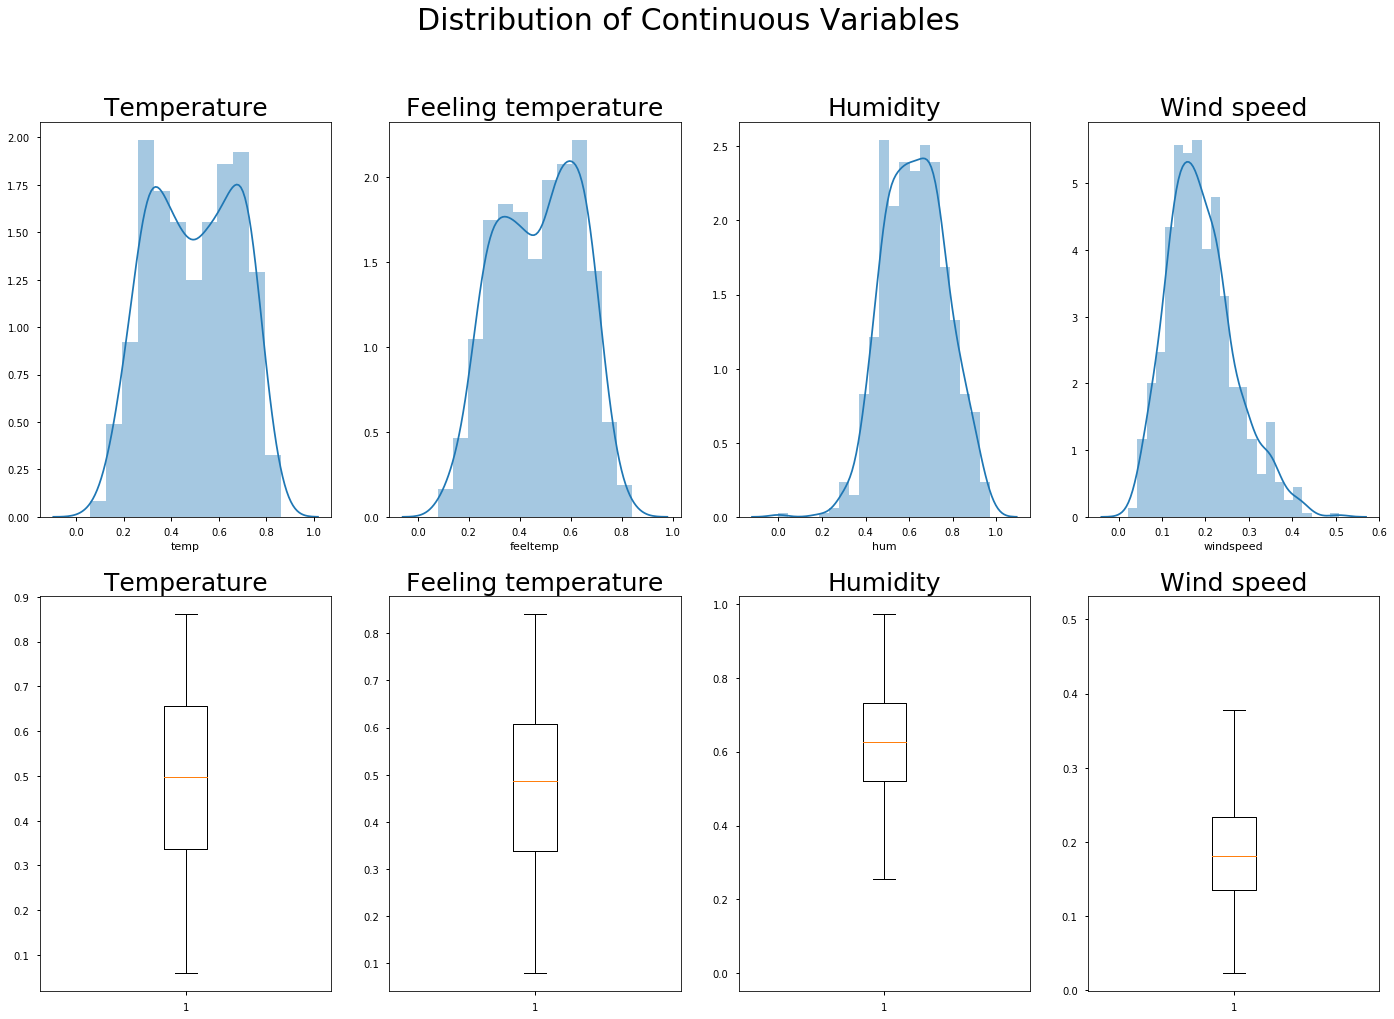

In [11]:
fig=plt.figure(figsize=(24,16))
ax1=fig.add_subplot(241)
#ax1.hist(bike_data["temp"],bins=50)
sns.distplot(bike_data["temp"],hist=True)
ax1.set_title('Temperature',fontsize=25)

ax2=fig.add_subplot(242)
#ax2.hist(bike_data["feeltemp"],bins=50)
sns.distplot(bike_data["feeltemp"],hist=True)
ax2.set_title('Feeling temperature',fontsize=25)

ax3=fig.add_subplot(243)
#ax3.hist(bike_data["hum"],bins=50)
sns.distplot(bike_data["hum"],hist=True)
ax3.set_title('Humidity',fontsize=25)

ax4=fig.add_subplot(244)
#ax4.hist(bike_data["windspeed"],bins=50)
sns.distplot(bike_data["windspeed"],hist=True)
ax4.set_title('Wind speed',fontsize=25)

ax5=fig.add_subplot(245)
ax5.boxplot(bike_data["temp"])
ax5.set_title("Temperature",fontsize=25)

ax6=fig.add_subplot(246)
ax6.boxplot(bike_data["feeltemp"])
ax6.set_title("Feeling temperature",fontsize=25)

ax7=fig.add_subplot(247)
ax7.boxplot(bike_data["hum"])
ax7.set_title("Humidity",fontsize=25)

ax8=fig.add_subplot(248)
ax8.boxplot(bike_data["windspeed"])
ax8.set_title("Wind speed",fontsize=25)

plt.suptitle("Distribution of Continuous Variables",fontsize=30)

plt.show()

<span style="color:blue">
    
### There are four continuous independent variables including temp,feeltemp, hum and windspeed. The output table shows the summary statistics for each variable, such as count, mean,standard deviation and so on. From the output table, range of temperature is 0.861667-0.059130=0.802537,mean is 0.495385, median is 0.498333,standard deviation is 0.183051. Because it is the normalized temperature, and divided by maximum number 41, so all the values should smaller than 1. Also, mean and median are very close, this means a symmetrical distribution. The boxplot shows there is no outlier. Similarly, other variables looks fine and make sense.In sum, all continuous variables looks reasonable and there are no outliers. 
</span>

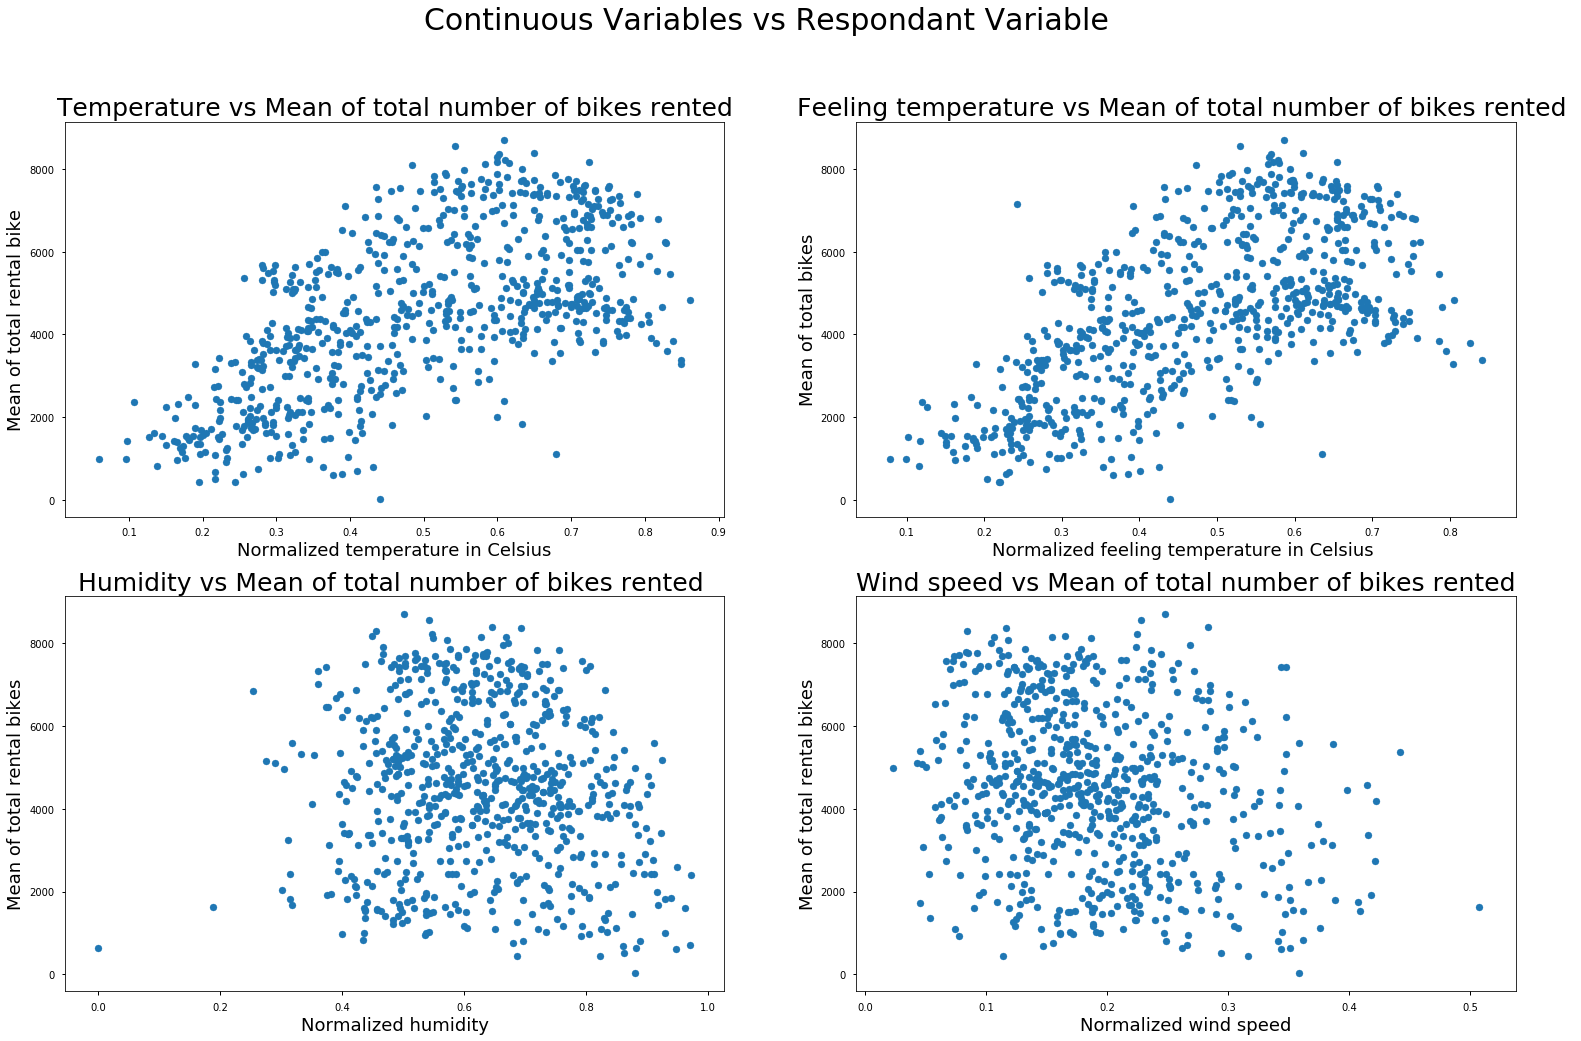

In [12]:
#explore continuous variables
fig=plt.figure(figsize=(26,16))
ax1=fig.add_subplot(221)
ax1.scatter(bike_data['temp'],bike_data['total'])
ax1.set_title("Temperature vs Mean of total number of bikes rented",fontsize=25)
ax1.set_xlabel("Normalized temperature in Celsius",fontsize=18)
ax1.set_ylabel("Mean of total rental bike",fontsize=18)

ax2=fig.add_subplot(222)
ax2.scatter(bike_data['feeltemp'],bike_data['total'])
ax2.set_title("Feeling temperature vs Mean of total number of bikes rented ",fontsize=25)
ax2.set_xlabel("Normalized feeling temperature in Celsius ",fontsize=18)
ax2.set_ylabel("Mean of total bikes",fontsize=18)

ax3=fig.add_subplot(223)
ax3.scatter(bike_data['hum'],bike_data['total'])
ax3.set_title("Humidity vs Mean of total number of bikes rented ",fontsize=25)
ax3.set_xlabel("Normalized humidity",fontsize=18)
ax3.set_ylabel("Mean of total rental bikes",fontsize=18)

ax4=fig.add_subplot(224)
ax4.scatter(bike_data['windspeed'],bike_data['total'])
ax4.set_title("Wind speed vs Mean of total number of bikes rented",fontsize=25)
ax4.set_xlabel("Normalized wind speed",fontsize=18)
ax4.set_ylabel("Mean of total rental bikes",fontsize=18)

fig.suptitle("Continuous Variables vs Respondant Variable",fontsize=30)
plt.show()


<span style="color:blue">
    
### The plot shows both temperature and feeling temperature have a positive relationship with the mean number of rented bikes. On the other hand, it seems there is no relationship between humidity and wind speed with the mean number of rented bikes.
</span>

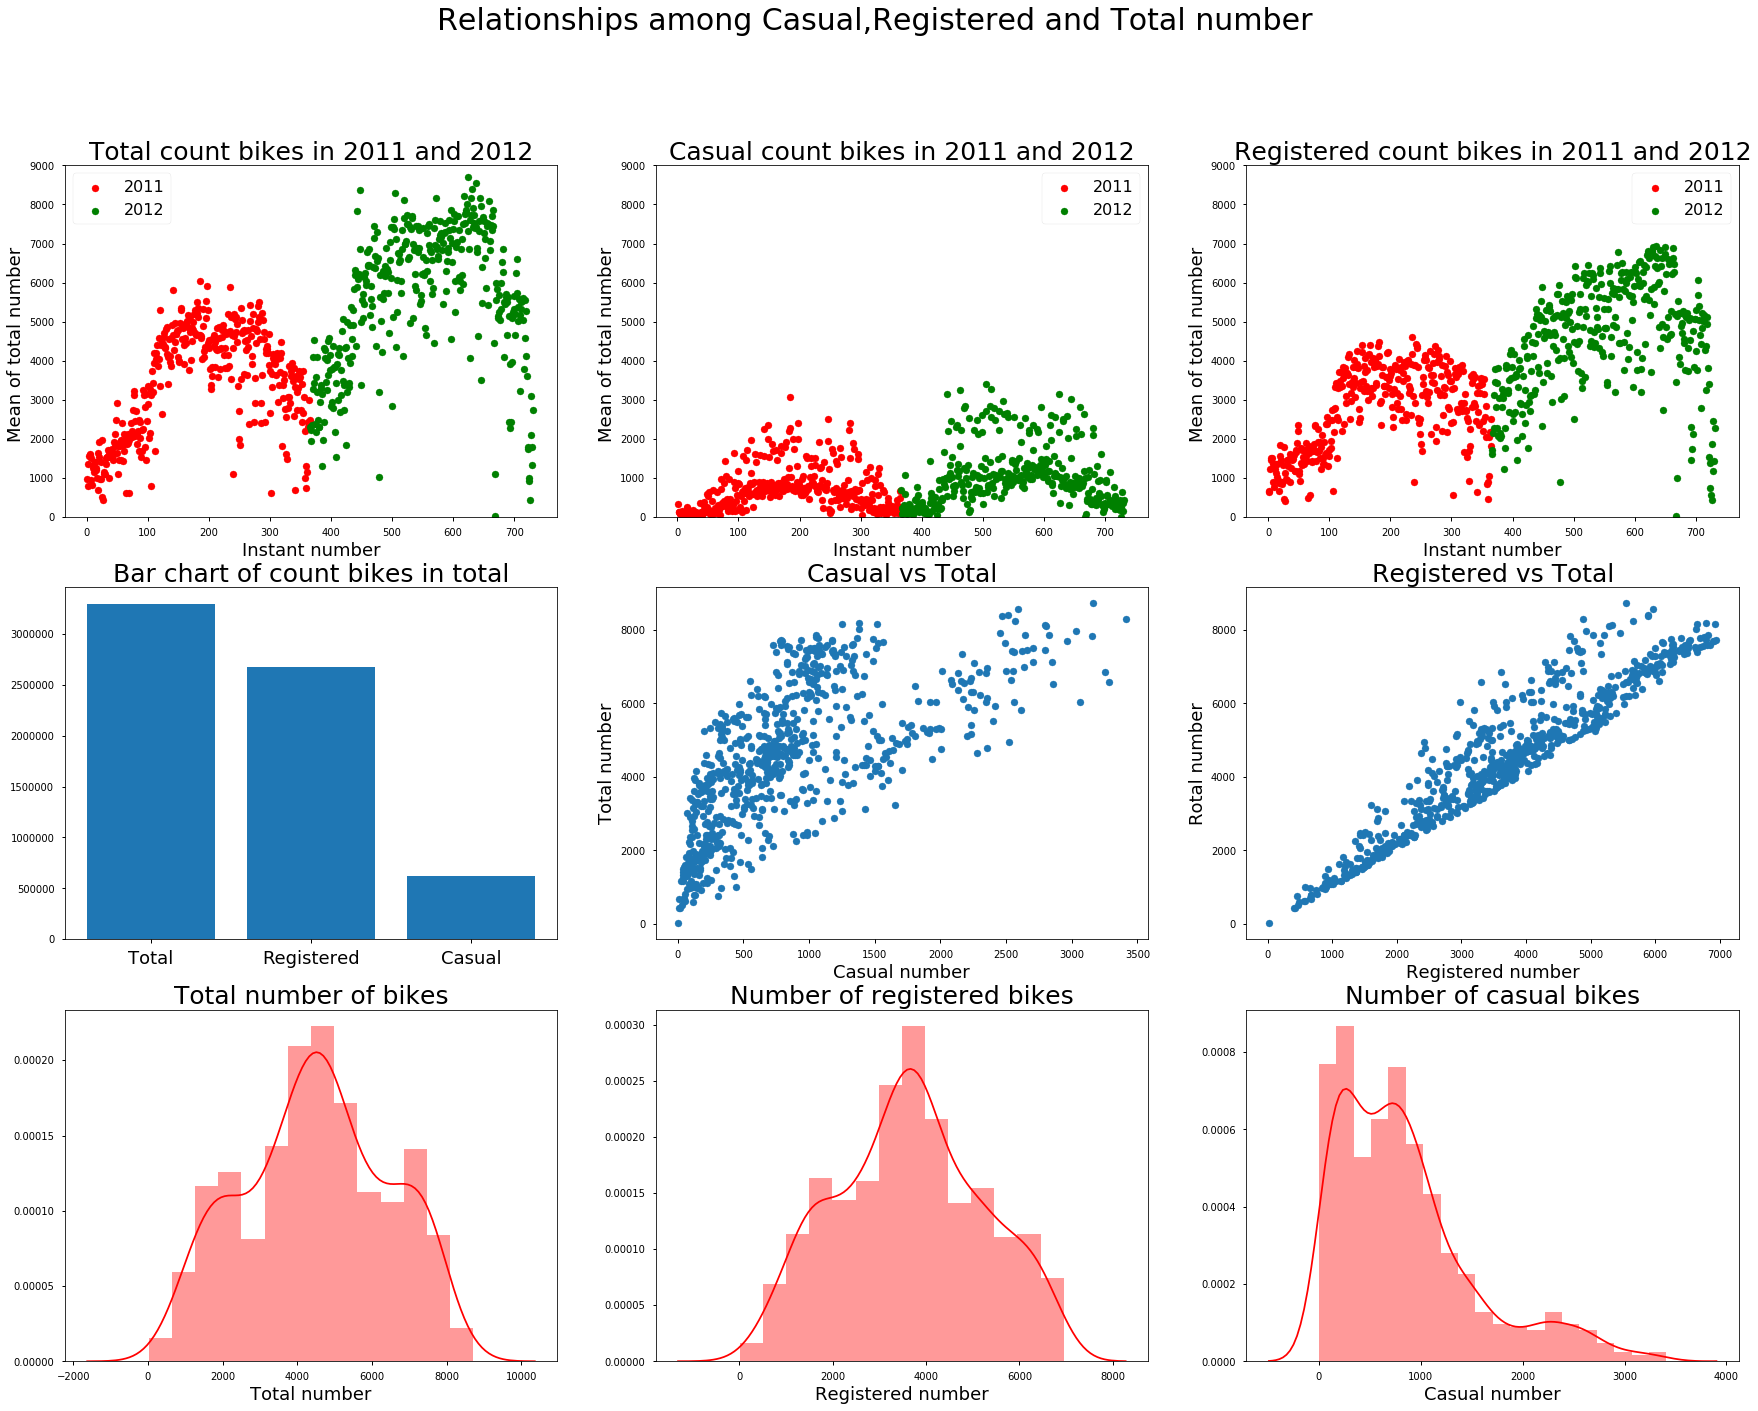

In [13]:
# explore respondent variables
data_2011=bike_data[bike_data['yr']==0]
data_2012=bike_data[bike_data['yr']==1]

fig = plt.figure(figsize=(30,22))
ax1 = fig.add_subplot(331)
ax1.scatter(data_2011['instant'],data_2011['total'],label='2011',color='red')
ax1.scatter(data_2012['instant'],data_2012['total'],label='2012',color='green')
ax1.set_title("Total count bikes in 2011 and 2012",fontsize=25)
ax1.set_ylim((0,9000))
ax1.set_xlabel("Instant number",fontsize=18)
ax1.set_ylabel("Mean of total number ",fontsize=18)
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(332)
ax2.scatter(data_2011['instant'],data_2011['casual'],label='2011',color='red')
ax2.scatter(data_2012['instant'],data_2012['casual'],label='2012',color='green')
ax2.set_title("Casual count bikes in 2011 and 2012",fontsize=25)
ax2.set_xlabel("Instant number",fontsize=18)
ax2.set_ylabel("Mean of total number ",fontsize=18)
ax2.set_ylim((0,9000))
ax2.legend(fontsize=16)

ax3 = fig.add_subplot(333)
ax3.scatter(data_2011['instant'],data_2011['registered'],label='2011',color='red')
ax3.scatter(data_2012['instant'],data_2012['registered'],label='2012',color='green')
ax3.set_title("Registered count bikes in 2011 and 2012",fontsize=25)
ax3.set_xlabel("Instant number",fontsize=18)
ax3.set_ylabel("Mean of total number ",fontsize=18)
ax3.set_ylim((0,9000))
ax3.legend(fontsize=16)

ax4 = fig.add_subplot(334)
index=np.arange(3)
sum_total=np.sum(bike_data['total'])
sum_casual=np.sum(bike_data['casual'])
sum_registered=np.sum(bike_data['registered'])
sum_all=[sum_total,sum_registered,sum_casual]

ax4.bar(index,sum_all)
ax4.set_title("Bar chart of count bikes in total",fontsize=25)
#ax4.set_ylim((0,2200000))
ax4.set_xticks(index)
ax4.set_xticklabels(('Total','Registered','Casual'),fontsize=18)

ax5 = fig.add_subplot(335)
ax5.scatter(bike_data['casual'],bike_data['total'])
ax5.set_title("Casual vs Total",fontsize=25)
ax5.set_xlabel("Casual number",fontsize=18)
ax5.set_ylabel("Total number",fontsize=18)

ax6 = fig.add_subplot(336)
ax6.scatter(bike_data['registered'],bike_data['total'])
ax6.set_title("Registered vs Total",fontsize=25)
ax6.set_xlabel("Registered number",fontsize=18)
ax6.set_ylabel("Rotal number",fontsize=18)

ax7=fig.add_subplot(337)
ax7=sns.distplot(bike_data['total'],color='red',hist=True)
ax7.set_title("Total number of bikes",fontsize=25)
ax7.set_xlabel("Total number",fontsize=18)

ax8=fig.add_subplot(338)
ax8=sns.distplot(bike_data['registered'],color='red',hist=True)
ax8.set_title("Number of registered bikes",fontsize=25)
ax8.set_xlabel("Registered number",fontsize=18)


ax9=fig.add_subplot(339)
ax9=sns.distplot(bike_data['casual'],color='red',hist=True)
ax9.set_title("Number of casual bikes",fontsize=25)
ax9.set_xlabel("Casual number",fontsize=18)


plt.suptitle("Relationships among Casual,Registered and Total number",fontsize=30)
plt.show()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### This plot shows the relationship between casual number, registered number and total number. From the first row plots, there is a clear trend of total rented bikes number in year 2011 and 2012 where it increases and then decreases. This trend also found in casual number and registered number. The second row shows the majority of total rented bikes are registered bikes. Also, there is a positive relationship between both registered number and casual number with total number. The density plot shows the distribution of total number of bikes and number of registered bikes are symmetric but casual bikes has a skewd distribution. 
</span>

## DATA ANALYSIS

### 1. Analysis relationship between weather situation / outside temperature and the number of bikes rented on a given day. 
<span style= 'float: right;'><b></b></span>

In [14]:
#weather situation
weather1_total=list(bike_data[bike_data['weathersit']==1]['total'])
weather2_total=list(bike_data[bike_data['weathersit']==2]['total'])
weather3_total=list(bike_data[bike_data['weathersit']==3]['total'])

weather_sub=[weather1_total,weather2_total,weather3_total]

anova_results_weather_123=spystats.f_oneway(weather1_total,weather2_total,weather3_total)
anova_results_weather_12=spystats.f_oneway(weather1_total,weather2_total)
anova_results_weather_13=spystats.f_oneway(weather1_total,weather3_total)
anova_results_weather_23=spystats.f_oneway(weather3_total,weather2_total)


print("The sample size for three weathers are ",[len(weather1_total),len(weather2_total),len(weather3_total)])
print("The mean for three weathers are ",[np.mean(weather1_total),np.mean(weather2_total),np.mean(weather3_total)])
print("The standard deviation for three weathers are ",[stats.pstdev(weather1_total),stats.pstdev(weather2_total),stats.pstdev(weather3_total)])

print("The One-Way anova statistics for three weathers is ",anova_results_weather_123[0]," , p-value is ",anova_results_weather_123[1])
print("The One-Way anova statistics for weather1 and weather2 is ",anova_results_weather_12[0]," , p-value is ",anova_results_weather_12[1])
print("The One-Way anova statistics for weather1 and weather3 is ",anova_results_weather_13[0]," , p-value is ",anova_results_weather_13[1])
print("The One-Way anova statistics for weather2 and weather3 is ",anova_results_weather_23[0]," , p-value is ",anova_results_weather_23[1])

The sample size for three weathers are  [463, 247, 21]
The mean for three weathers are  [4876.7861771058315, 4035.862348178138, 1803.2857142857142]
The standard deviation for three weathers are  [1877.4532114519438, 1805.4440382864154, 1210.3936841987813]
The One-Way anova statistics for three weathers is  40.06604492024684  , p-value is  3.106317270053755e-17
The One-Way anova statistics for weather1 and weather2 is  33.08936390469654  , p-value is  1.3098546508618891e-08
The One-Way anova statistics for weather1 and weather3 is  55.00957186188967  , p-value is  5.446215924898237e-13
The One-Way anova statistics for weather2 and weather3 is  30.69901866096448  , p-value is  7.241695029624096e-08


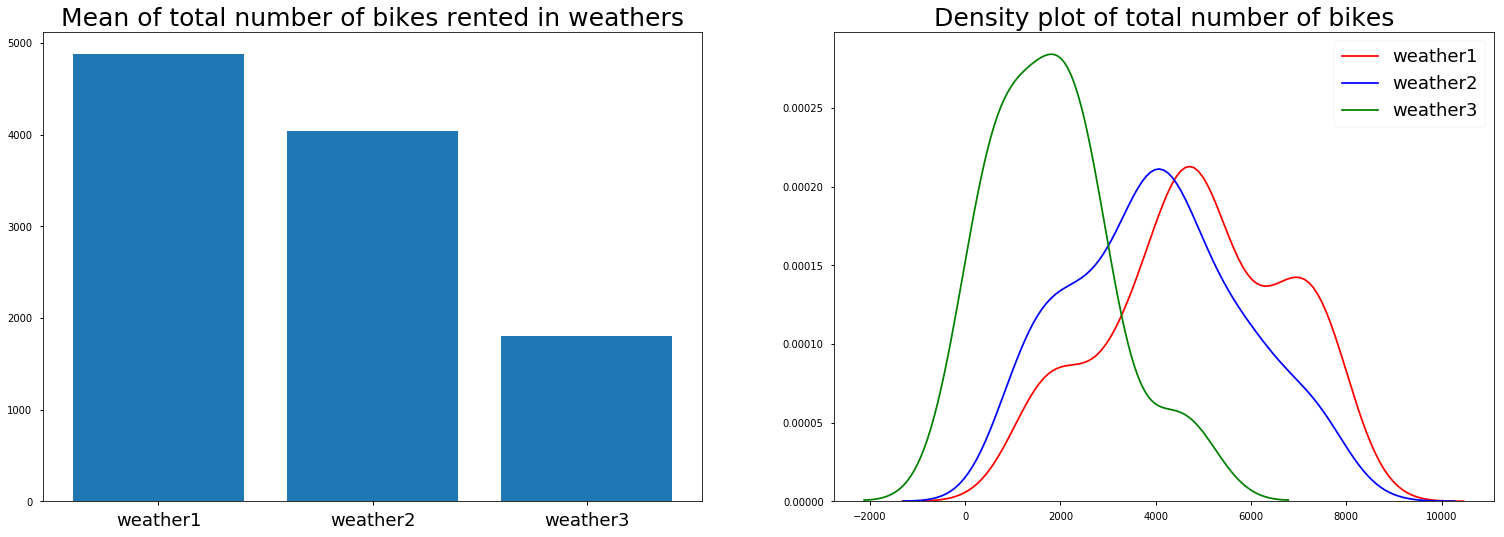

In [15]:
fig=plt.figure(figsize=(26,19))
ax1=fig.add_subplot(221)
ax1.bar(list(weather_group.index.values),list(weather_group['mean']))
ax1.set_title('Mean of total number of bikes rented in weathers',fontsize=25)
ax1.set_xticks(list(weather_group.index.values))
ax1.set_xticklabels(['weather1','weather2','weather3'],fontsize=18)

ax2=fig.add_subplot(222)
ax2=sns.distplot(weather1_total,color='red',hist=False,label="weather1")
ax2=sns.distplot(weather2_total,color='blue',hist=False,label="weather2")
ax2=sns.distplot(weather3_total,color='green',hist=False,label="weather3")
ax2.set_title("Density plot of total number of bikes",fontsize=25)
ax2.legend(fontsize=18)

plt.show()

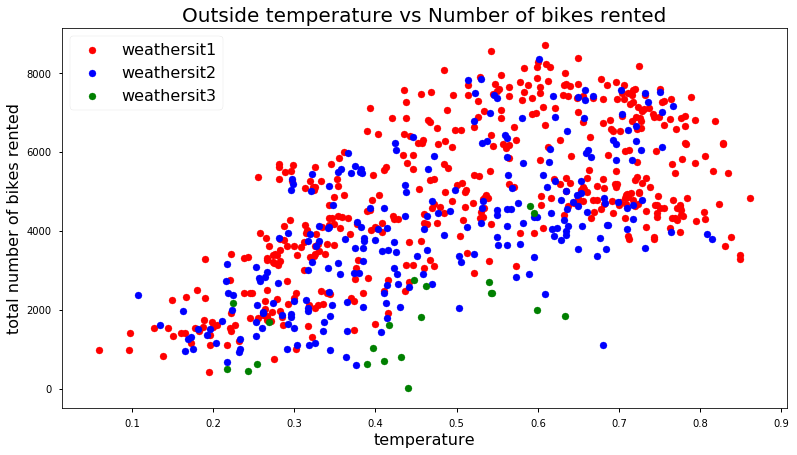

In [16]:
# outside temperature
temp=bike_data['temp']
total=bike_data['total']
plt.figure(figsize=(13,7))
plt.scatter(bike_data[bike_data['weathersit']==1]['temp'],bike_data[bike_data['weathersit']==1]['total'],color='r',label='weathersit1')
plt.scatter(bike_data[bike_data['weathersit']==2]['temp'],bike_data[bike_data['weathersit']==2]['total'],color='b',label='weathersit2')
plt.scatter(bike_data[bike_data['weathersit']==3]['temp'],bike_data[bike_data['weathersit']==3]['total'],color='g',label='weathersit3')
plt.title('Outside temperature vs Number of bikes rented',fontsize=20)
plt.xlabel("temperature",fontsize=16)
plt.ylabel("total number of bikes rented",fontsize=16)
plt.legend(fontsize=16)
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [17]:
corr_temp_total=np.corrcoef(temp,total)[0][1]
print("The correlation between outside temperature and total number of bikes is :", np.round(corr_temp_total,4))

The correlation between outside temperature and total number of bikes is : 0.6275


<span style="color:blue">
    
 
### The bar plot shows there is a big difference of mean of total number bikes in different weather situations. In the one-way anova test, null hypothesis is the mean total numbers of bike in three different weathers are same. Before doing test, we need to check the assumptions, normality, equal variance and independent.The density plot shows normality and equal variance are acceptable. Result shows the p-value is smaller than 0.05 for all tests and we can reject the null hypothesis and conclude there is difference of mean number of bikes in different weather situaiton.So there is relationship between weather condition and number of bikes. The scatter plot shows there is a positive relationship between outside temperature and total number of bikes in all three weather situations. We can see the total number increase when temperature increase. Also, the correlation is 0.6275 that means a positive relationship between two variables. So there is a positive relationship between outside temperature and number of bikes. Thus the answer is there is relationship between weather situation / outside temperature and the number of bikes rented on a given day.

</span>

### 2. Analysis relationship between the day of the week / holiday and the number of bikes rented on a given day.
<span style= 'float: right;'><b></b></span>

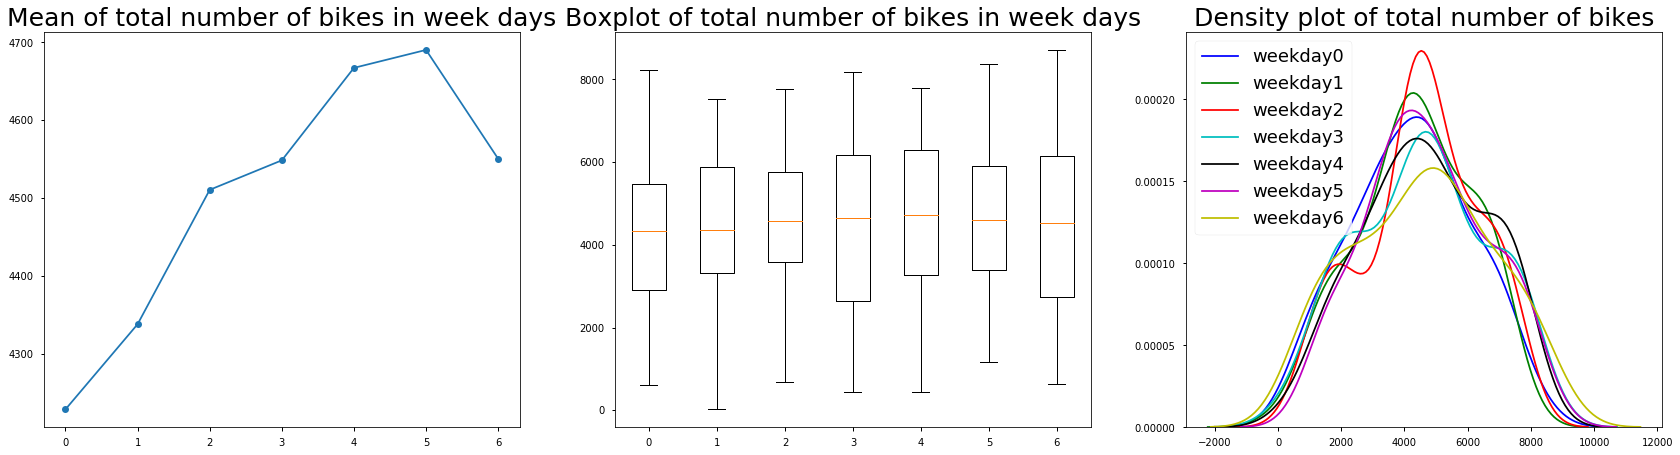

In [18]:
#dayweek_group
weekday0_total=list(bike_data[bike_data['weekday']==0]['total'])
weekday1_total=list(bike_data[bike_data['weekday']==1]['total'])
weekday2_total=list(bike_data[bike_data['weekday']==2]['total'])
weekday3_total=list(bike_data[bike_data['weekday']==3]['total'])
weekday4_total=list(bike_data[bike_data['weekday']==4]['total'])
weekday5_total=list(bike_data[bike_data['weekday']==5]['total'])
weekday6_total=list(bike_data[bike_data['weekday']==6]['total'])

sub_dayweek=[weekday0_total,weekday1_total,weekday2_total,weekday3_total,weekday4_total,weekday5_total,weekday6_total]

fig=plt.figure(figsize=(29,16))
ax1=fig.add_subplot(231)
x=list(dayweek_group.index.values)
ax1.plot(np.arange(len(x)),list(dayweek_group['mean']),marker='o')
ax1.set_title('Mean of total number of bikes in week days',fontsize=25)

ax2=fig.add_subplot(232)
ax2.boxplot(sub_dayweek)
ax2.set_title("Boxplot of total number of bikes in week days",fontsize=25)
ax2.set_xticklabels(['0','1','2','3','4','5','6'])

ax3=fig.add_subplot(233)
ax3=sns.distplot(weekday0_total,color='b',hist=False,label="weekday0")
ax3=sns.distplot(weekday1_total,color='g',hist=False,label="weekday1")
ax3=sns.distplot(weekday2_total,color='r',hist=False,label="weekday2")
ax3=sns.distplot(weekday3_total,color='c',hist=False,label="weekday3")
ax3=sns.distplot(weekday4_total,color='k',hist=False,label="weekday4")
ax3=sns.distplot(weekday5_total,color='m',hist=False,label="weekday5")
ax3=sns.distplot(weekday6_total,color='y',hist=False,label="weekday6")
ax3.set_title("Density plot of total number of bikes",fontsize=25)
ax3.legend(fontsize=18)

plt.show()

In [19]:
sample_size_weekday=[len(weekday0_total),len(weekday1_total),len(weekday2_total),len(weekday3_total),len(weekday4_total),len(weekday5_total),len(weekday6_total)]
anova_results_weekday=spystats.f_oneway(weekday0_total,weekday1_total,weekday2_total,weekday3_total,weekday4_total,weekday5_total,weekday6_total)

print("The sample size for day in week are ",sample_size_weekday)
print("The One-Way anova test statistics is ",anova_results_weekday[0]," , p-value is ",anova_results_weekday[1])

The sample size for day in week are  [105, 105, 104, 104, 104, 104, 105]
The One-Way anova test statistics is  0.7828624296214937  , p-value is  0.583494082505154


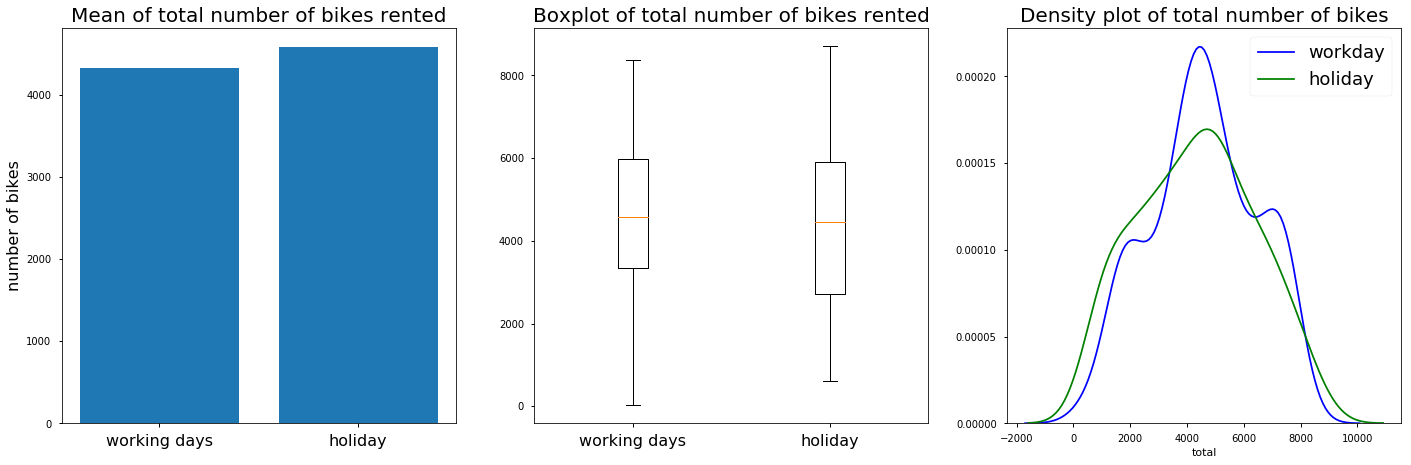

In [20]:
# holiday
workday_total=bike_data[bike_data['workingday']==1]['total']
nonworkday_total=bike_data[bike_data['workingday']==0]['total']
sub_workday=[workday_total,nonworkday_total]

fig=plt.figure(figsize=(24,16))
ax1=fig.add_subplot(231)
x=np.arange(2)
ax1.bar(x,work_group['mean'])
ax1.set_title('Mean of total number of bikes rented',fontsize=20)
ax1.set_xticks(list(work_group.index.values))
ax1.set_xticklabels(['working days','holiday'],fontsize=16)
ax1.set_ylabel("number of bikes",fontsize=16)

ax2=fig.add_subplot(232)
ax2.boxplot(sub_workday)
#ax2.set_xticks(list(work_group.index.values))
ax2.set_title('Boxplot of total number of bikes rented',fontsize=20)
ax2.set_xticklabels(['working days','holiday'],fontsize=16)

ax3=fig.add_subplot(233)
ax3=sns.distplot(workday_total,color='b',hist=False,label="workday")
ax3=sns.distplot(nonworkday_total,color='g',hist=False,label="holiday")
ax3.set_title("Density plot of total number of bikes",fontsize=20)
ax3.legend(fontsize=18)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [21]:
sample_size_workday=[len(workday_total),len(nonworkday_total)]
anova_results_workday=spystats.f_oneway(workday_total,nonworkday_total)
t_results_workday=spystats.ttest_ind(workday_total,nonworkday_total)
print("The sample size for working day and holiday are ",sample_size_workday)
print("The One-Way anova test statistics is ",anova_results_workday[0]," , p-value is ",anova_results_workday[1])
print("The t test statistics is ",t_results_workday[0]," , p-value is ",t_results_workday[1])

The sample size for working day and holiday are  [500, 231]
The One-Way anova test statistics is  2.736742283191394  , p-value is  0.0984949616002635
The t test statistics is  1.6543102137118633  , p-value is  0.09849496160024915


<span style="color:blue">
    
### The first line chart shows the trend of mean number of bikes in different week days. It looks there is a difference but we should notice the y axis not starts from zero. The null hypothesis is no relationship between mean total number of bikes on different days in week. Before the anova test, we need to check the assumptions, normality, equal variance and independent. The density plot looks fine. One way anova test shows the p-value is 0.5835 that is greater than 0.05 and accept null hypothesis, so there is no significant difference in the mean number of bikes in terms of different day in week. Also the boxplot support this conclusion. For the second plot, the bar chart shows there is little difference in mean number of bikes in working day and holiday,but the one way anova test shows the p-value is 0.0985 that greater than 0.05 again, also the assumptions are good, so we accept null hypothesis and conclude there is no sigificant difference in mean number of bikes in working days and holidays. The t-test does the same thing as F test and has the same p-value. The boxplot also support this result. So there is no relationship between the day of the week / holiday and the mean number of bikes rented on a given day.

</span>

### 3. Analysis the number of registered and casual users vary with respect to each other during holidays and work days. 
<span style= 'float: right;'><b></b></span>

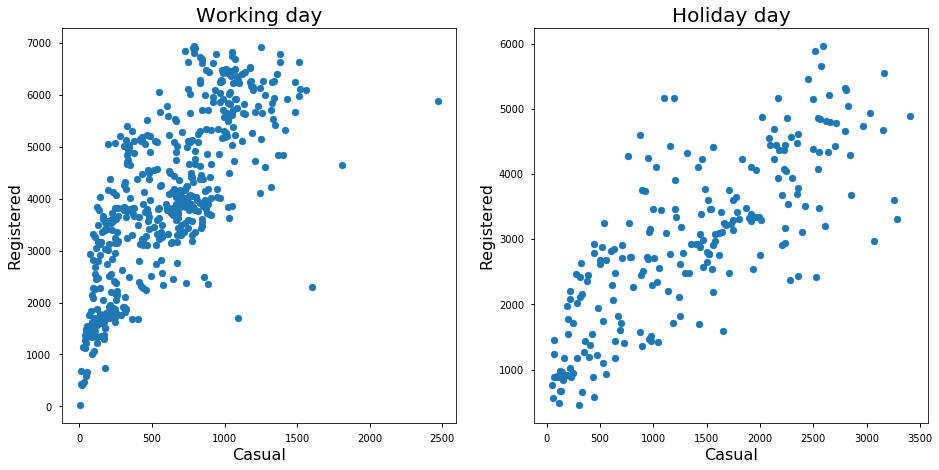

In [22]:
# YOUR CODE HERE
workday=bike_data[bike_data['workingday']==1]
nonworkday=bike_data[bike_data['workingday']==0]
x=np.arange(2)

fig=plt.figure(figsize=(24,16))

ax1=fig.add_subplot(231)
ax1.scatter(workday['casual'],workday['registered'])
ax1.set_title('Working day',fontsize=20)
ax1.set_ylabel("Registered",fontsize=16)
ax1.set_xlabel("Casual",fontsize=16)

ax2=fig.add_subplot(232)
ax2.scatter(nonworkday['casual'],nonworkday['registered'])
ax2.set_title('Holiday day',fontsize=20)
ax2.set_ylabel("Registered",fontsize=16)
ax2.set_xlabel("Casual",fontsize=16)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [23]:
print("The correlation between registered and casual bikes on working day is: ",np.corrcoef(workday['registered'],workday['casual'])[0][1] )
print("The correlation between registered and casual bikes on holiday is: ", np.corrcoef(nonworkday['registered'],nonworkday['casual'])[0][1])

lm=LinearRegression()
model_work=lm.fit(np.array(workday['casual']).reshape(-1,1),workday['registered'])

print("The intercept and slope for model on working day are: ", np.round(model_work.intercept_,2), np.round(model_work.coef_[0],2))
model_nonwork=lm.fit(np.array(nonworkday['casual']).reshape(-1,1),nonworkday['registered'])
print("The intercept and slope for model on holiday day are: ", np.round(model_nonwork.intercept_,2), np.round(model_nonwork.coef_[0],2))


The correlation between registered and casual bikes on working day is:  0.7444431278836852
The correlation between registered and casual bikes on holiday is:  0.7856322221356258
The intercept and slope for model on working day are:  2168.9 2.98
The intercept and slope for model on holiday day are:  1362.63 1.16


<span style="color:blue">
    
### The both plots shows there is a relationship between registered bikes number and casual bikes number. A positive relationship means the registered bikes number increase when casual bikes number increase. Also, we can see the increase rate on working day is faster than on holiday.  The correlations show a strong positive relationship between registered bikes number and casual bikes number on both working day and holiday. Also the slope for working day model is 2.98 that is greater than slope on holiday 1.16. This result consist with the above conclusion that increase rate is faster on working day. On working day, when casual bikes number increase 1 unit, the registered bikes number increase 2.98 on average. On holiday, when casual bikes number increase 1 unit, the registered bikes number increase 1.16 on average.


</span>

### 4. Analysis relationship among the attributes relating to weather in this dataset
<span style= 'float: right;'><b></b></span>

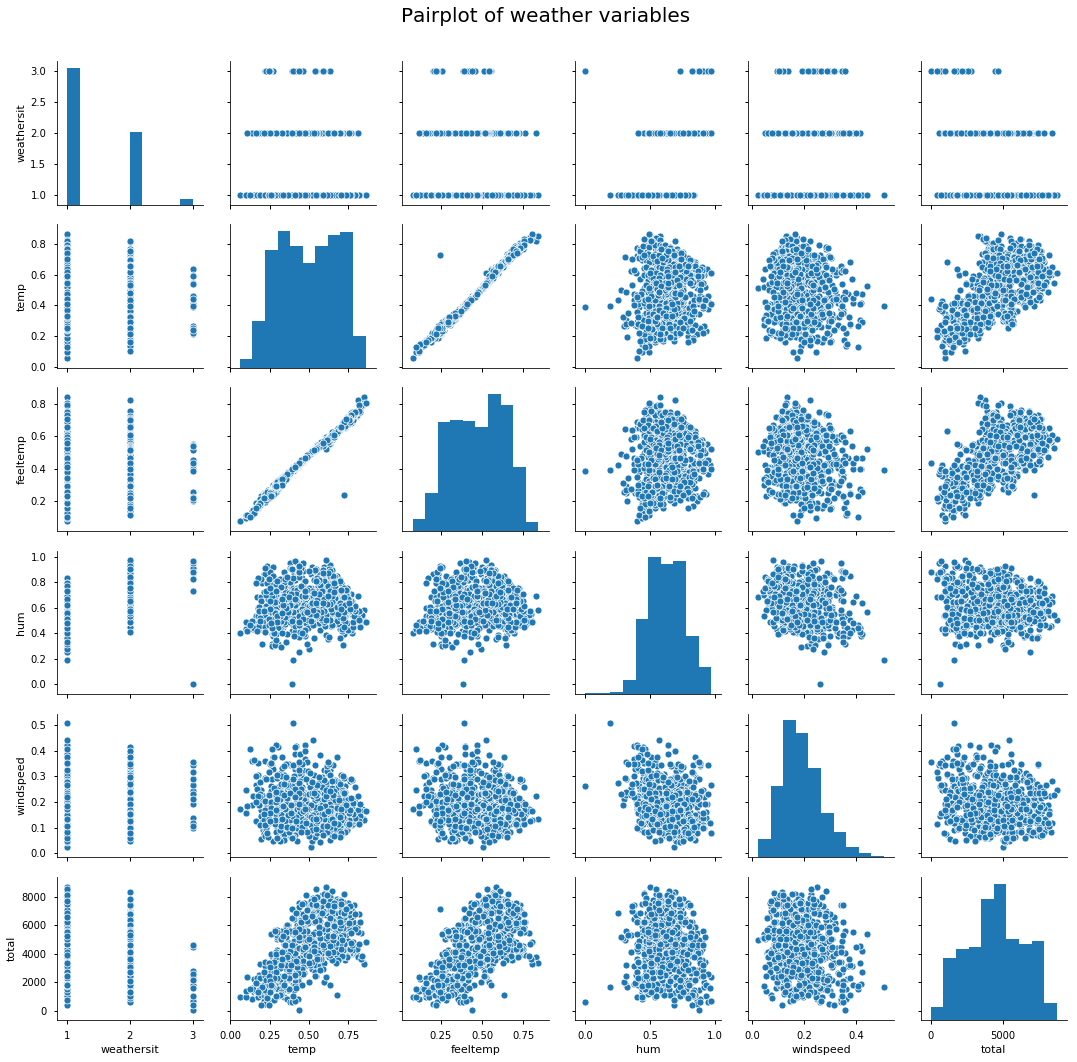

In [25]:
# YOUR CODE HERE
weather=bike_data[['weathersit','temp','feeltemp','hum','windspeed','total']]
g=sns.pairplot(weather)
plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairplot of weather variables",fontsize=20)
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [26]:
corr = weather.drop("weathersit",axis=1).corr()
print("The correlation table is")
corr

The correlation table is


,temp,feeltemp,hum,windspeed,total
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
feeltemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
total,0.627494,0.631066,-0.100659,-0.234545,1.000000


<span style="color:blue">
    
### This plot shows the relationship among five variables that are all about weather. There is a strong positive relationship between temperature and feeling temperature. For other variables such as weathersit,hum and windspeed, there is no obvious relationship between each others. So later when we build model,we just need one variable that is temperature or feeling temperature. The table shows the correlation between variables. The correlation coefficient between feeltemp and temp is 0.99, which is very strong postive relationship. For other variables, the correlation coefficients are very small. The table consist with plot result. In addition, we can see only temp and feeltemp have correlation coefficient with total variable around 0.6, while for other variables, the correlations are very small and near zero. So I will not include hum,windspeed and weathersit in linear model. 


</span>

### 5. From this dataset, analysis the ratio change of two groups on rental bikes.
<span style= 'float: right;'><b></b></span>

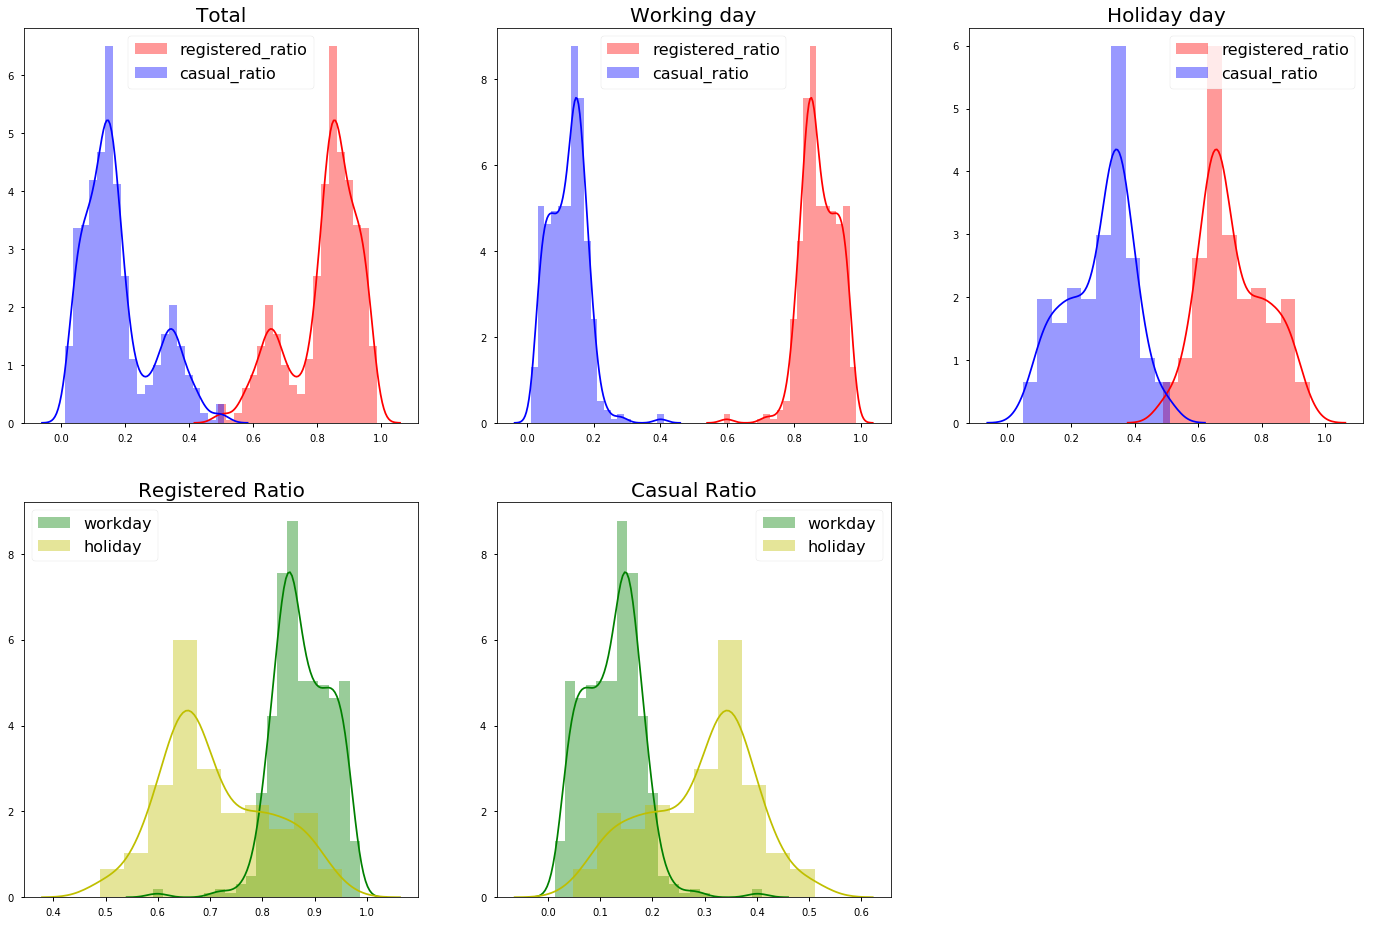

In [27]:
registered_ratio=bike_data['registered']/bike_data['total']
casual_ratio=bike_data['casual']/bike_data['total']


fig=plt.figure(figsize=(24,16))

ax1=fig.add_subplot(231)
ax1=sns.distplot(registered_ratio,color="r",label="registered_ratio")
ax1=sns.distplot(casual_ratio,color="b",label="casual_ratio")
plt.legend(fontsize=16)
ax1.set_title("Total",fontsize=20)

ax2=fig.add_subplot(232)
ax2=sns.distplot(workday['registered_ratio'],color="r",label="registered_ratio")
ax2=sns.distplot(workday['casual_ratio'],color="b",label="casual_ratio")
ax2.set_title("Working day",fontsize=20)
ax2.set_xlabel(" ")
plt.legend(fontsize=16)

ax3=fig.add_subplot(233)
ax3=sns.distplot(nonworkday['registered_ratio'],color="r",label="registered_ratio")
ax3=sns.distplot(nonworkday['casual_ratio'],color="b",label="casual_ratio")
ax3.set_title("Holiday day",fontsize=20)
ax3.set_xlabel(" ")
plt.legend(fontsize=16)

ax4=fig.add_subplot(234)
ax4=sns.distplot(workday['registered_ratio'],color="g",label="workday")
ax4=sns.distplot(nonworkday['registered_ratio'],color="y",label="holiday")
ax4.set_title("Registered Ratio",fontsize=20)
ax4.set_xlabel(" ")
plt.legend(fontsize=16)

ax5=fig.add_subplot(235)
ax5=sns.distplot(workday['casual_ratio'],color="g",label="workday")
ax5=sns.distplot(nonworkday['casual_ratio'],color="y",label="holiday")
ax5.set_title("Casual Ratio",fontsize=20)
ax5.set_xlabel(" ")
plt.legend(fontsize=16)
plt.show()


In [28]:
print("The sample size for registered ratio on working day and holidays are ",[len(workday['registered_ratio']),len(nonworkday['registered_ratio'])])
print("The mean for registered ratio on working day and holidays are ",[np.round(np.mean(workday['registered_ratio']),4),np.round(np.mean(nonworkday['registered_ratio']),4)])
print("The standard deviation for registered ratio on working day and holidays are ",[np.round(stats.pstdev(workday['registered_ratio']),4),np.round(stats.pstdev(nonworkday['registered_ratio']),4)])
anova_results_registered_ratio=spystats.f_oneway(workday['registered_ratio'],nonworkday['registered_ratio'])
print("The One-Way anova statistics for registered ratio is ",np.round(anova_results_registered_ratio[0],4)," , p-value is ",np.round(anova_results_registered_ratio[1],8))
print(" ")
print("The sample size for casual ratio on working day and holidays are ",[len(workday['casual_ratio']),len(nonworkday['casual_ratio'])])
print("The mean for casual ratio on working day and holidays are ",[np.round(np.mean(workday['casual_ratio']),4),np.round(np.mean(nonworkday['casual_ratio']),4)])
print("The standard deviation for casual ratio on working day and holidays are ",[np.round(stats.pstdev(workday['casual_ratio']),4),np.round(stats.pstdev(nonworkday['casual_ratio']),4)])
anova_results_casual_ratio=spystats.f_oneway(workday['casual_ratio'],nonworkday['casual_ratio'])
print("The One-Way anova statistics for casual ratio is ",np.round(anova_results_casual_ratio[0],4)," , p-value is ",np.round(anova_results_casual_ratio[1],8))


The sample size for registered ratio on working day and holidays are  [500, 231]
The mean for registered ratio on working day and holidays are  [0.8775, 0.7095]
The standard deviation for registered ratio on working day and holidays are  [0.0542, 0.1038]
The One-Way anova statistics for registered ratio is  821.3604  , p-value is  0.0
 
The sample size for casual ratio on working day and holidays are  [500, 231]
The mean for casual ratio on working day and holidays are  [0.1225, 0.2905]
The standard deviation for casual ratio on working day and holidays are  [0.0542, 0.1038]
The One-Way anova statistics for casual ratio is  821.3604  , p-value is  0.0


<span style="color:blue">
    
### In previous analysis, we only analysis the difference in numbers. But in some situations, for example for registered users,  there maybe a decrease in the ratio (registered/total) though the number increase.  So I want to analysis if the change on ratio significant or not on working day and holiday for both registered and casual users. The first plot shows the majority of bike users are registered users,which account for 60 percent to 100 percent in different days, and only less than 40 percent users are casual users. This difference is more clear during working days. In second plot, there is no overlap between two groups, more than 80 percent users are registered users and casual users are less than 20 percent. However, compared to second plot, the third plot shows on holidays the mean proportion of casual users increase whereas mean proportion of registered users decrease. The fourth and fifth plot show the ratio distribution on workday and holiday. For registered ratio, mean on working day is larger than on holiday, but for casual ration, mean on holiday is larger than on working day. Also, the one-way anova result shows the difference on ratio mean is significant for both registered and casual users. But when we notice the variance, its not equal. So the anova rest result may have some problems and we need further study to deel with this problem.  In sum, from working day to holiday, there is an decrease on the proportion of registered users and an increase on the proportion of casual users . We may conclude more registered users perfer use bikes on working day and more casual users perfer use bikes on holiday. 


</span>

## LINEAR REGRESSION

Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years. I implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. 
<span style= 'float: right;'><b></b></span>

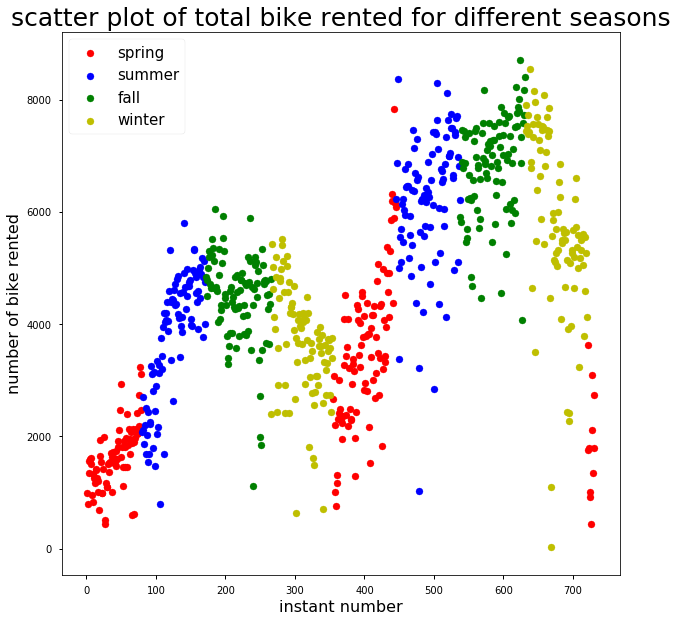

In [31]:
# YOUR CODE HERE
y=bike_data['total']
season_1_data=bike_data[bike_data['season']==1]
season_2_data=bike_data[bike_data['season']==2]
season_3_data=bike_data[bike_data['season']==3]
season_4_data=bike_data[bike_data['season']==4]

plt.figure(figsize=(10,10))
plt.scatter(season_1_data['instant'],season_1_data['total'],color='r',label='spring')
plt.scatter(season_2_data['instant'],season_2_data['total'],color='b',label='summer')
plt.scatter(season_3_data['instant'],season_3_data['total'],color='g',label='fall')
plt.scatter(season_4_data['instant'],season_4_data['total'],color='y',label='winter')
plt.legend(fontsize=15)

plt.title("scatter plot of total bike rented for different seasons",fontsize=25)
plt.xlabel("instant number",fontsize=16)
plt.ylabel("number of bike rented",fontsize=16)
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [30]:
season1=bike_data[bike_data['season']==1]
season2=bike_data[bike_data['season']==2]
season3=bike_data[bike_data['season']==3]
season4=bike_data[bike_data['season']==4]

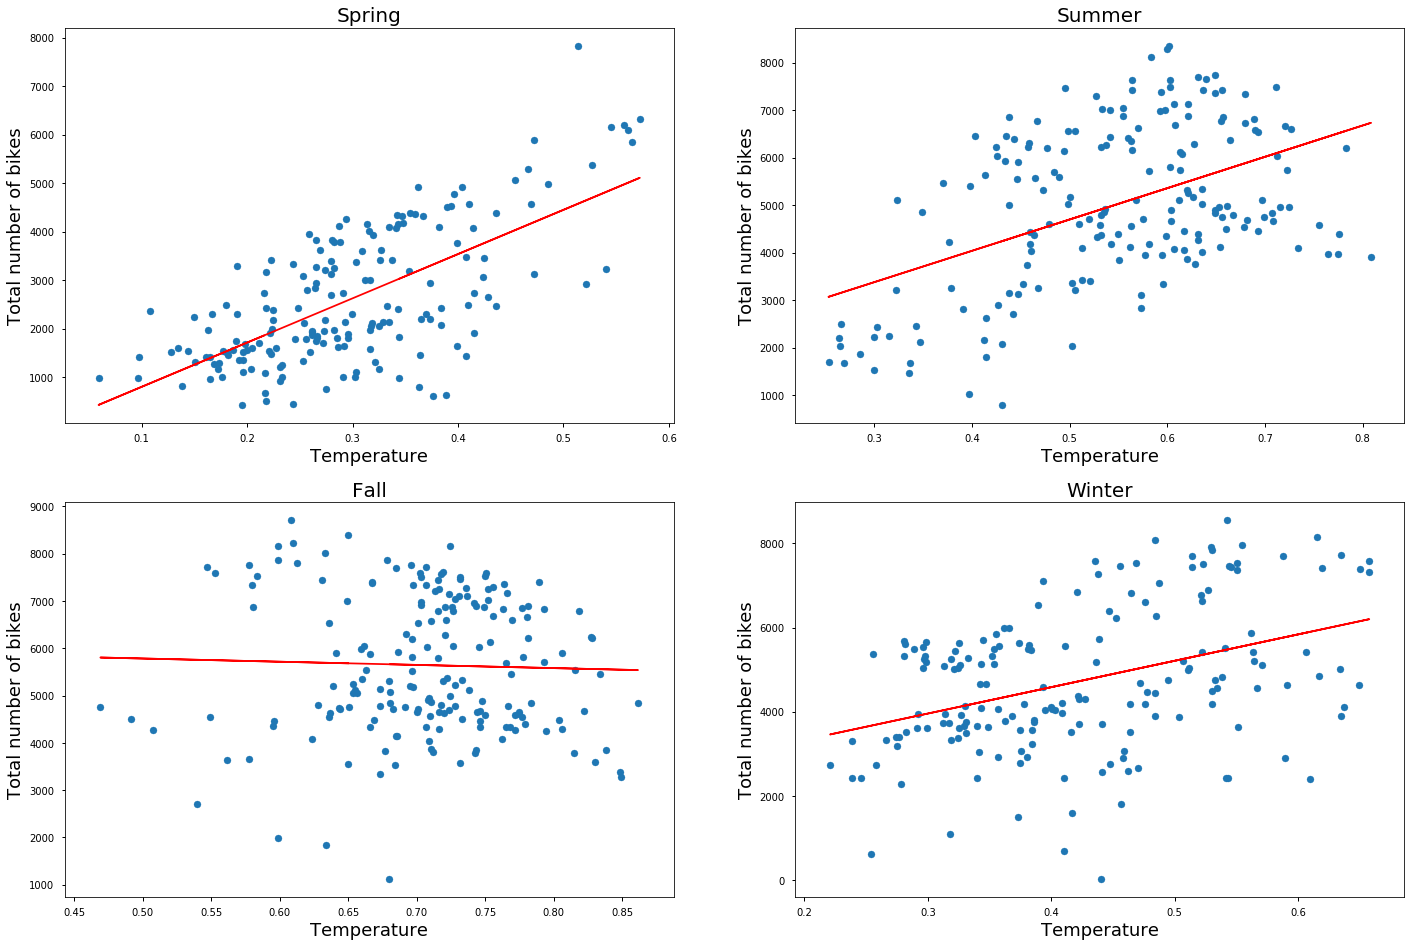

In [31]:
x_1=season1['temp'].values.reshape(-1,1)
y_1=season1['total']
model_1=LinearRegression().fit(x_1,y_1)
#print(model_1.intercept_,model_1.coef_[0])
estimate_1=model_1.intercept_+model_1.coef_[0]*x_1
r2_1=skl.metrics.r2_score(y_1,estimate_1)
mse_1=skl.metrics.mean_squared_error(y_1,estimate_1)

x_2=season2['temp'].values.reshape(-1,1)
y_2=season2['total']
model_2=LinearRegression().fit(x_2,y_2)
#print(model_2.intercept_,model_2.coef_[0])
estimate_2=model_2.intercept_+model_2.coef_[0]*x_2
r2_2=skl.metrics.r2_score(y_2,estimate_2)
mse_2=skl.metrics.mean_squared_error(y_2,estimate_2)

x_3=season3['temp'].values.reshape(-1,1)
y_3=season3['total']
model_3=LinearRegression().fit(x_3,y_3)
#print(model_3.intercept_,model_3.coef_[0])
estimate_3=model_3.intercept_+model_3.coef_[0]*x_3
r2_3=skl.metrics.r2_score(y_3,estimate_3)
mse_3=skl.metrics.mean_squared_error(y_3,estimate_3)

x_4=season4['temp'].values.reshape(-1,1)
y_4=season4['total']
model_4=LinearRegression().fit(x_4,y_4)
#print(model_4.intercept_,model_4.coef_[0])
estimate_4=model_4.intercept_+model_4.coef_[0]*x_4
r2_4=skl.metrics.r2_score(y_4,estimate_4)
mse_4=skl.metrics.mean_squared_error(y_4,estimate_4)

fig=plt.figure(figsize=(24,16))
ax1=fig.add_subplot(221)
ax1.scatter(x_1,y_1)
ax1.plot(x_1,estimate_1,color="red")
ax1.set_title("Spring",fontsize=20)
ax1.set_xlabel("Temperature",fontsize=18)
ax1.set_ylabel("Total number of bikes",fontsize=18)

ax2=fig.add_subplot(222)
ax2.scatter(x_2,y_2)
ax2.plot(x_2,estimate_2,color="red")
ax2.set_title("Summer",fontsize=20)
ax2.set_xlabel("Temperature",fontsize=18)
ax2.set_ylabel("Total number of bikes",fontsize=18)

ax3=fig.add_subplot(223)
ax3.scatter(x_3,y_3)
ax3.plot(x_3,estimate_3,color="red")
ax3.set_title("Fall",fontsize=20)
ax3.set_xlabel("Temperature",fontsize=18)
ax3.set_ylabel("Total number of bikes",fontsize=18)

ax4=fig.add_subplot(224)
ax4.scatter(x_4,y_4)
ax4.plot(x_4,estimate_4,color="red")
ax4.set_title("Winter",fontsize=20)
ax4.set_xlabel("Temperature",fontsize=18)
ax4.set_ylabel("Total number of bikes",fontsize=18)

plt.show()

In [32]:
r_square=[r2_1,r2_2,r2_3,r2_4]
mse_list=[mse_1,mse_2,mse_3,mse_4]
model_name=['Spring','Summer','Fall',"Winter"]
d_result={'Model':model_name,'R Square':r_square,'MSE':mse_list}
df_result=pd.DataFrame(d_result)
df_result.set_index("Model",inplace=True)
df_result

,R Square,MSE
Model,,
Spring,0.447832,1.076182e+06
Summer,0.227419,2.210129e+06
Fall,0.001077,2.117399e+06
Winter,0.158138,2.418218e+06


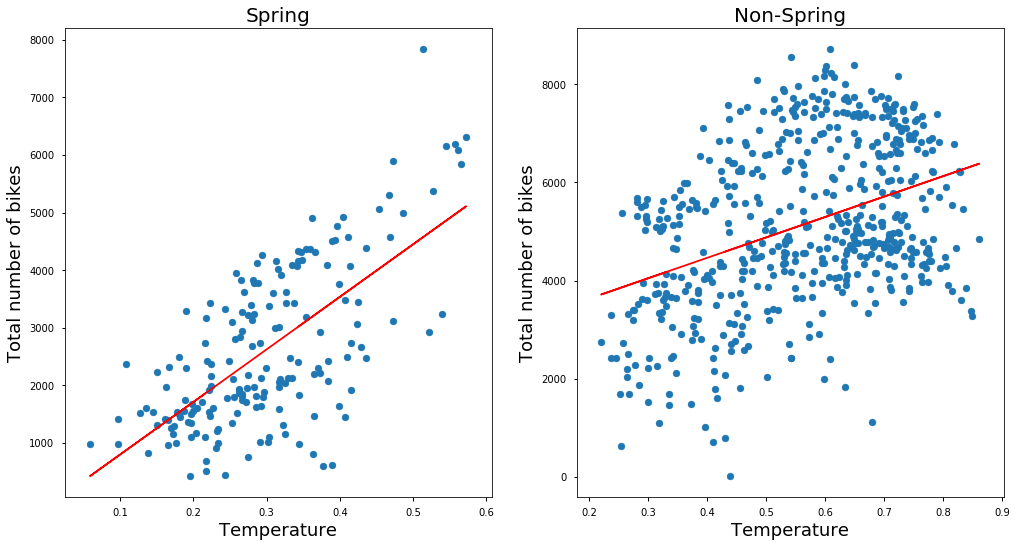

In [33]:
spring=bike_data[bike_data['season']==1]
non_spring=bike_data[bike_data['season']!=1]

spring_temp=spring['temp'].values.reshape(-1,1)
spring_total=spring['total']
model_spring=LinearRegression().fit(spring_temp,spring_total)
#print(model_1.intercept_,model_1.coef_[0])
estimate_spring=model_spring.intercept_+model_spring.coef_[0]*spring_temp
r2_spring=skl.metrics.r2_score(spring_total,estimate_spring)
mse_spring=skl.metrics.mean_squared_error(spring_total,estimate_spring)

non_spring_temp=non_spring['temp'].values.reshape(-1,1)
non_spring_total=non_spring['total']
model_non_spring=LinearRegression().fit(non_spring_temp,non_spring_total)
#print(model_1.intercept_,model_1.coef_[0])
estimate_non_spring=model_non_spring.intercept_+model_non_spring.coef_[0]*non_spring_temp
r2_non_spring=skl.metrics.r2_score(non_spring_total,estimate_non_spring)
mse_non_spring=skl.metrics.mean_squared_error(non_spring_total,estimate_non_spring)

r_square_spring=[r2_spring,r2_non_spring]
mse_list_spring=[mse_spring,mse_non_spring]
model_name_spring=['Spring','NonSpring']
d_result_spring={'Model':model_name_spring,'R Square':r_square_spring,'MSE':mse_list_spring}
df_result_spring=pd.DataFrame(d_result_spring)
df_result_spring.set_index("Model",inplace=True)


fig=plt.figure(figsize=(26,19))
ax1=fig.add_subplot(231)
ax1.scatter(spring['temp'],spring['total'])
ax1.plot(spring['temp'],estimate_spring,color='red')
ax1.set_title("Spring",fontsize=20)
ax1.set_xlabel("Temperature",fontsize=18)
ax1.set_ylabel("Total number of bikes",fontsize=18)

ax2=fig.add_subplot(232)
ax2.scatter(non_spring['temp'],non_spring['total'])
ax2.plot(non_spring['temp'],estimate_non_spring,color='red')
ax2.set_title("Non-Spring",fontsize=20)
ax2.set_xlabel("Temperature",fontsize=18)
ax2.set_ylabel("Total number of bikes",fontsize=18)

plt.show()

In [34]:
df_result_spring

,R Square,MSE
Model,,
Spring,0.447832,1.076182e+06
NonSpring,0.150080,2.345974e+06


In [35]:
x_3=bike_data[['season','temp']]
y_3=bike_data['total']
model_3=LinearRegression().fit(x_3,y_3)
estimate_3=model_3.intercept_+model_3.coef_[0]*bike_data['season']+model_3.coef_[1]*bike_data['temp']
r2_model3=skl.metrics.r2_score(y_3,estimate_3)
mse_model3=skl.metrics.mean_squared_error(y_3,estimate_3)
#print(r2_model3,mse_model3)

r_square_model3=[r2_model3]
mse_model3=[mse_model3]
model_name_model3=['Model 3']
d_result_model3={'Model':model_name_model3,'R Square':r_square_model3,'MSE':mse_model3}
df_result_model3=pd.DataFrame(d_result_model3)
df_result_model3.set_index("Model",inplace=True)
df_result_model3


,R Square,MSE
Model,,
Model 3,0.43714,2.109405e+06


In [37]:
display_side_by_side(df_result,df_result_spring,df_result_model3)
print("The second method")
print("The intercept and slope for spring model :" ,[np.round(model_spring.intercept_,2) , np.round(model_spring.coef_[0],2)])
print("The intercept and slope for non-spring model :" ,[np.round(model_non_spring.intercept_,2) , np.round(model_non_spring.coef_[0],2)])

,R Square,MSE
Model,,
Spring,0.447832,1.076182e+06
Summer,0.227419,2.210129e+06
Fall,0.001077,2.117399e+06
Winter,0.158138,2.418218e+06
,R Square,MSE
Model,,
Spring,0.447832,1.076182e+06
NonSpring,0.150080,2.345974e+06
,R Square,MSE


The second method
The intercept and slope for spring model : [-111.04, 9119.04]
The intercept and slope for non-spring model : [2798.19, 4160.24]


<span style="color:blue">
    
### 
The first plot shows there is a clear trend of total bikes in different seasons. It increases in the first half year and then decrease until end year. I want to use linear model to describe this trend and tried three different methods to build model. The first one is building four different models for each season. But the result looks not good because only model in spring has relatively high R square and small MSE. Other models especially fall season, the linear model does not fit the data. So in the second method, I build model just depend on spring season and non-spring season. Now the result looks good and model is simpler than first method as we only have two models instead of four here.The last method is build multiple linear model based on variable season and temperature. R square looks good but MSE is larger than spring model in second method. So, based on the model simplicity,R square and MSE, the final model is the second method where I build simple linear model when season is spring and not spring. When season is Spring, Total number=-111.04+9119.04$*$Temperature. When season is not Spring, Total number=2798.19+4160.24$*$Temperature.  


</span>